In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, InputLayer
import tensorflow.keras as keras
import tensorflow as tf

In [ ]:
!mkdir /content/files
os.chdir('/content/files')
!gdown --id 1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
!gdown --id 1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
!gdown --id 1AanuBUBAYigNQn0h8iLA1Z096I-S9UqZ
!gdown --id 18bXJWtYQgjWFyepsj-Vc-Hwuf-NdUsKQ
!gdown --id 1RjJ8IHWCmU65sRTPfAUyXTR3kTZ7ez2y
!gdown --id 1LiqDEFRRofNNNjUrcy770sKXzUAeYawA

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O1d32HU9bKvvqLill5ogDFdQ0e5rMvOx
To: /content/files/x_test.zip
100% 6.74M/6.74M [00:00<00:00, 60.5MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut
From (redirected): https://drive.google.com/uc?id=1V8HOw3BLIk5ZYMcMgzHPNqt9GxU5jTut&confirm=t&uuid=cef6dd0a-894b-4461-b0ee-5971df3a92ee
To: /content/files/x_train.zip
100% 121M/121M [00:01<00:00, 91.7MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was de

In [ ]:
!unzip x_test.zip
!unzip x_train.zip
!unzip x_val.zip
!unzip y_test.zip
!unzip y_train.zip
!unzip y_val.zip

Archive:  x_test.zip
  inflating: x_test.csv              
Archive:  x_train.zip
  inflating: x_train.csv             
Archive:  x_val.zip
  inflating: x_val.csv               
Archive:  y_test.zip
  inflating: y_test.csv              
Archive:  y_train.zip
  inflating: y_train.csv             
Archive:  y_val.zip
  inflating: y_val.csv               


In [ ]:
x_train = pd.read_csv('/content/files/x_train.csv')
x_test = pd.read_csv('/content/files/x_test.csv')
x_val = pd.read_csv('/content/files/x_val.csv')
y_train = pd.read_csv('/content/files/y_train.csv')
y_test = pd.read_csv('/content/files/y_test.csv')
y_val = pd.read_csv('/content/files/y_val.csv')

In [ ]:
# print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
datasets_cat = [x_train, x_test, x_val]
datasets = [y_train, y_test, y_val]

for dataset in datasets_cat:
    dataset.drop(['Unnamed: 0', 'categoryId'], axis=1, inplace=True)

for dataset in datasets:
    dataset.drop(['Unnamed: 0'], axis=1, inplace=True)

for dataset in datasets_cat:
  bool_int_columns = dataset.select_dtypes(include=['bool', 'int64']).columns
  dataset[bool_int_columns] = dataset[bool_int_columns].astype(float)

# x_test.info()

In [ ]:
x_train = x_train.to_numpy()
x_val = x_val.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
# scaling feature data using MinMax
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

# scaling target values
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_scaled = y_scaler.transform(y_val.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.reshape(-1, 1))

In [ ]:
# scaling feature data using StandardScalar
scaler = StandardScaler()
x_train_stand = scaler.fit_transform(x_train)
x_val_stand = scaler.transform(x_val)
x_test_stand = scaler.transform(x_test)

y_train_stand = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_val_stand = y_scaler.transform(y_val.reshape(-1, 1))
y_test_stand = y_scaler.transform(y_test.reshape(-1, 1))

[[ 1.79175947  9.03066332  4.23120374 ...  0.          0.
   0.        ]
 [ 1.38629436  9.23574818  0.         ...  0.          1.
   0.        ]
 [ 1.60943791  8.80836915  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.94591015  8.29990745  0.         ...  0.          0.
   0.        ]
 [ 1.94591015 10.18380507  0.         ...  0.          0.
   0.        ]
 [ 1.38629436 10.06886074  0.         ...  0.          0.
   0.        ]]


In [ ]:
def rmse_sklearn(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32).numpy()
    y_pred = tf.cast(y_pred, tf.float32).numpy()
    return root_mean_squared_error(y_true, y_pred)

In [ ]:
# This model uses batch normalization and has both features and labels scaled.
# Scaled using MinMaxScaler
model = Sequential()

# Input Layer
_, input_shape = x_train.shape
model.add(InputLayer(input_shape=(input_shape,), name='input'))

# Hidden Layer 1 with Batch Normalization
model.add(Dense(units=64, name='hl_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 2 with Batch Normalization
model.add(Dense(units=32, name='hl_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 3 with Batch Normalization
model.add(Dense(units=16, name='hl_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1, activation='linear', name='output'))


# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit the Model
history = model.fit(
    x_train_scaled, y_train_scaled,
    validation_data=(x_val_scaled, y_val_scaled),
    epochs=25, batch_size=32
)

# Predict and Evaluate
y_pred_scaled = model.predict(x_test_scaled)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_scaled)

mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE on Original Scale: {mae_original}")
print(f"MSE on Original Scale: {mse_original}")

Epoch 1/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - loss: 0.0379 - mae: 0.1229 - mse: 0.0379 - val_loss: 0.0059 - val_mae: 0.0577 - val_mse: 0.0059
Epoch 2/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0060 - mae: 0.0590 - mse: 0.0060 - val_loss: 0.0047 - val_mae: 0.0512 - val_mse: 0.0047
Epoch 3/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 0.0051 - mae: 0.0543 - mse: 0.0051 - val_loss: 0.0051 - val_mae: 0.0553 - val_mse: 0.0051
Epoch 4/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 0.0047 - mae: 0.0522 - mse: 0.0047 - val_loss: 0.0045 - val_mae: 0.0499 - val_mse: 0.0045
Epoch 5/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.0045 - mae: 0.0511 - mse: 0.0045 - val_loss: 0.0045 - val_mae: 0.0497 - val_mse: 0.0045
Epoch 6/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0043 - mae: 0.0503 - mse: 0.0043 - val_loss: 0.0046 - val_mae: 0.0509 - val_mse: 0.0046
Epoch 7/25
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 38s 3ms/step - loss: 0.0042 - mae: 0.049

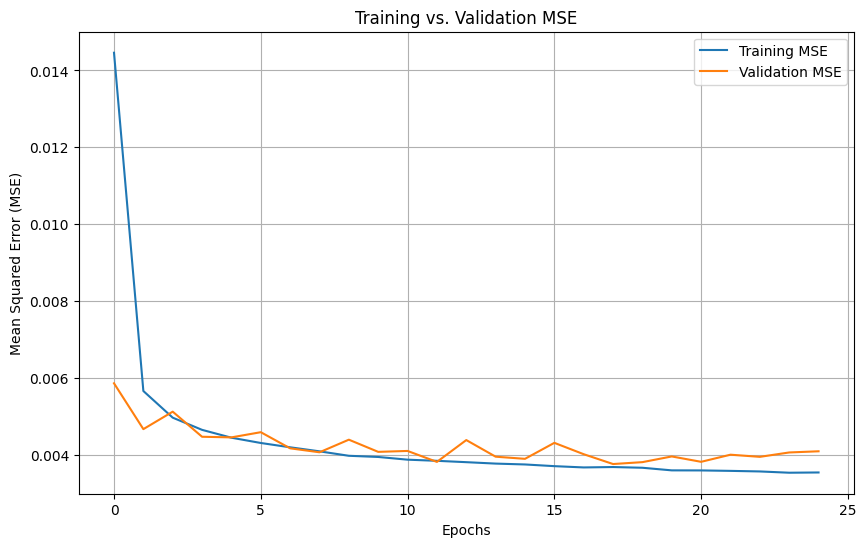

In [ ]:
import matplotlib.pyplot as plt

# Extract MSE values for training and validation from history
train_mse = history.history['mse']
val_mse = history.history['val_mse']

# Create a plot for training vs. validation MSE
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs. Validation MSE')
plt.legend()
plt.grid(True)
plt.show()


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


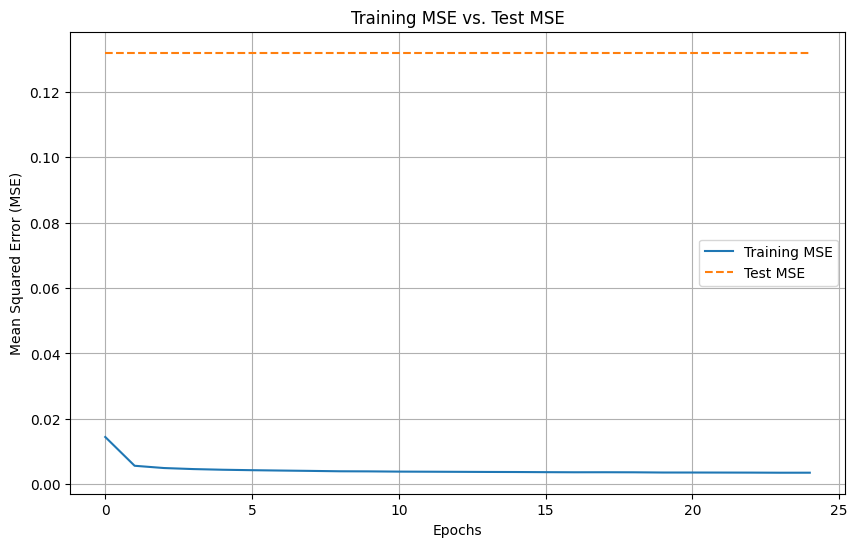

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Extract training MSE from history
train_mse = history.history['mse']

# Compute test MSE
y_pred_test_scaled = model.predict(x_test_scaled)
y_pred_test_original = y_scaler.inverse_transform(y_pred_test_scaled)
test_mse = mean_squared_error(y_test, y_pred_test_original)

# Create an array of the test MSE repeated for each epoch
test_mse_epochs = [test_mse] * len(train_mse)

# Plot training MSE vs. test MSE
plt.figure(figsize=(10, 6))
plt.plot(train_mse, label='Training MSE')
plt.plot(test_mse_epochs, label='Test MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training MSE vs. Test MSE')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# This model uses generic model structure, has both features and label scaled.
# Scaled using MinMaxScaler

model = Sequential()
_, input_shape  = x_train.shape
input_layer = keras.layers.InputLayer(input_shape=(input_shape,), name='input')
model.add(input_layer)
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
model.add(hidden_layer_1)
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
model.add(hidden_layer_2)
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
model.add(hidden_layer_3)
output_layer = keras.layers.Dense(units=1, activation='linear', name='output')
model.add(output_layer)

model.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])
history = model.fit(x_train_scaled, y_train_scaled, validation_data=(x_val_scaled, y_val_scaled), epochs=50, batch_size=32)


y_pred_scaled = model.predict(x_test_scaled)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_scaled)
mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE on Original Scale: {mae_original}")
print(f"MSE on Original Scale: {mse_original}")

Epoch 1/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0698 - mae: 0.0698 - mse: 0.0093 - val_loss: 0.0548 - val_mae: 0.0548 - val_mse: 0.0055
Epoch 2/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0552 - mae: 0.0552 - mse: 0.0056 - val_loss: 0.0537 - val_mae: 0.0537 - val_mse: 0.0051
Epoch 3/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0515 - mae: 0.0515 - mse: 0.0049 - val_loss: 0.0520 - val_mae: 0.0520 - val_mse: 0.0051
Epoch 4/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.0498 - mae: 0.0498 - mse: 0.0046 - val_loss: 0.0542 - val_mae: 0.0542 - val_mse: 0.0056
Epoch 5/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.0487 - mae: 0.0487 - mse: 0.0045 - val_loss: 0.0503 - val_mae: 0.0503 - val_mse: 0.0046
Epoch 6/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0477 - mae: 0.0477 - mse: 0.0043 - val_loss: 0.0484 - val_mae: 0.0484 - val_mse: 0.0046
Epoch 7/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0471 - mae: 0.047

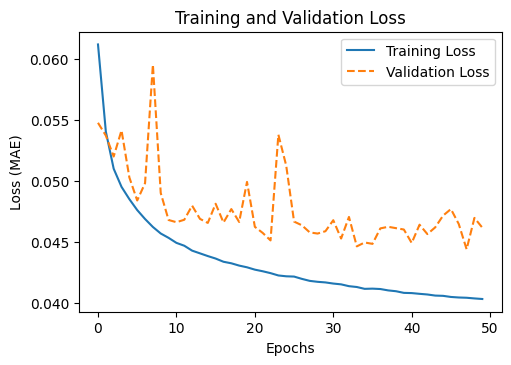

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 8))

# Plot Loss
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()

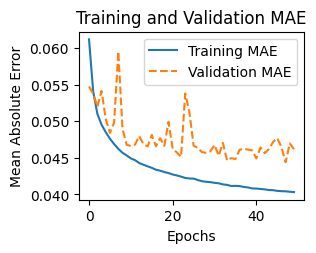

In [ ]:
# Plot Mean Absolute Error (MAE)
plt.subplot(2, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

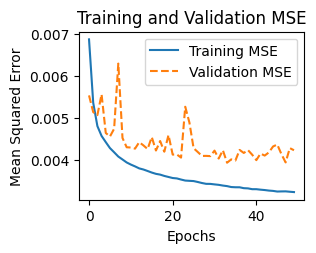

In [ ]:
# Plot Mean Squared Error (MSE)
plt.subplot(2, 2, 3)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE')
plt.legend()

In [ ]:
# This model uses generic model structure, has features scaled but label left as is at begining
# (not scaled). Features scaled using MinMaxScaler

model = Sequential()
_, input_shape  = x_train.shape
input_layer = keras.layers.InputLayer(input_shape=(input_shape,), name='input')
model.add(input_layer)
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
model.add(hidden_layer_1)
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
model.add(hidden_layer_2)
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
model.add(hidden_layer_3)
output_layer = keras.layers.Dense(units=1, activation='linear', name='output')
model.add(output_layer)

model.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])
history = model.fit(x_train_scaled, y_train, validation_data=(x_val_scaled, y_val), epochs=50, batch_size=32)


y_pred_scaled = model.predict(x_test_scaled)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_scaled)
mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE is: {mae_original}")
print(f"MSE is: {mse_original}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.8349 - mae: 0.8349 - mse: 4.2791 - val_loss: 0.3866 - val_mae: 0.3866 - val_mse: 0.2813
Epoch 2/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.3878 - mae: 0.3878 - mse: 0.2792 - val_loss: 0.3773 - val_mae: 0.3773 - val_mse: 0.2724
Epoch 3/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.3673 - mae: 0.3673 - mse: 0.2547 - val_loss: 0.3649 - val_mae: 0.3649 - val_mse: 0.2438
Epoch 4/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.3558 - mae: 0.3558 - mse: 0.2403 - val_loss: 0.3605 - val_mae: 0.3605 - val_mse: 0.2388
Epoch 5/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.3493 - mae: 0.3493 - mse: 0.2338 - val_loss: 0.3484 - val_mae: 0.3484 - val_mse: 0.2327
Epoch 6/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.3419 - mae: 0.3419 - mse: 0.2248 - val_loss: 0.3426 - val_mae: 0.3426 - val_mse: 0.2268
Epoch 7/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 0.3393 - mae: 0.339

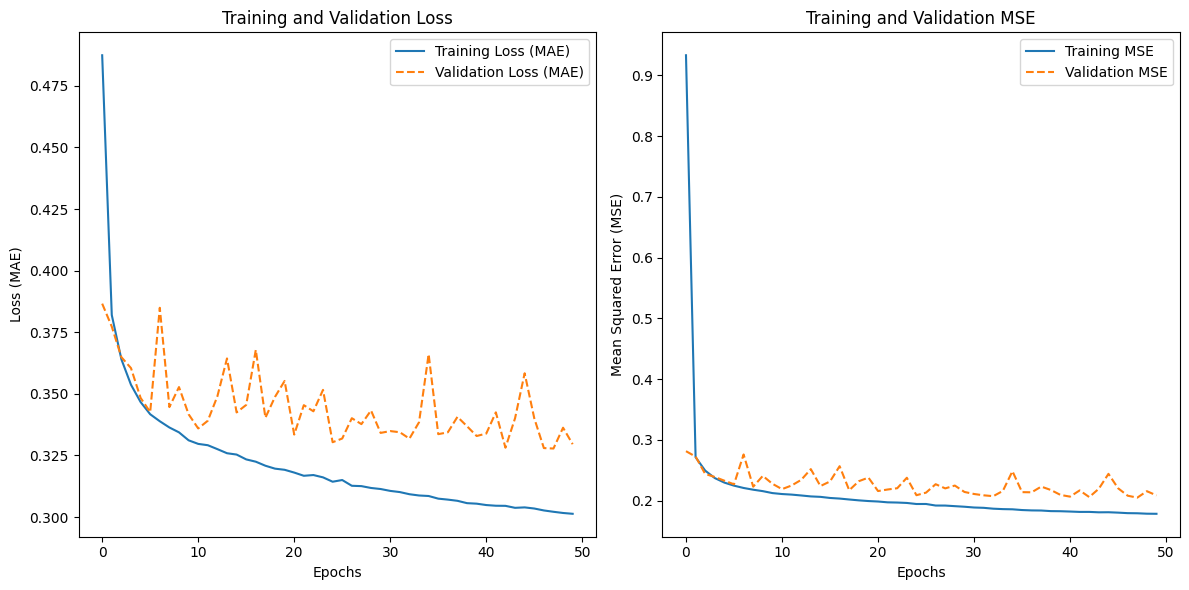

In [ ]:
plt.figure(figsize=(12, 6))

# Loss (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()

# Metrics (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# This model uses batch normalization and has both features and labels scaled.
# Scaled using MinMaxScaler
model = Sequential()

# Input Layer
_, input_shape = x_train.shape
model.add(InputLayer(input_shape=(input_shape,), name='input'))

# Hidden Layer 1 with Batch Normalization
model.add(Dense(units=64, name='hl_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 2 with Batch Normalization
model.add(Dense(units=32, name='hl_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 3 with Batch Normalization
model.add(Dense(units=16, name='hl_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1, activation='linear', name='output'))

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

# Fit the Model
history = model.fit(
    x_train_scaled, y_train_scaled,
    validation_data=(x_val_scaled, y_val_scaled),
    epochs=25, batch_size=32
)

# Predict and Evaluate
y_pred_scaled = model.predict(x_test_scaled)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_scaled)

mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE on Original Scale: {mae_original}")
print(f"MSE on Original Scale: {mse_original}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.1183 - mae: 0.1183 - mse: 0.0393 - val_loss: 0.0535 - val_mae: 0.0535 - val_mse: 0.0054
Epoch 2/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0574 - mae: 0.0574 - mse: 0.0059 - val_loss: 0.0528 - val_mae: 0.0528 - val_mse: 0.0053
Epoch 3/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0547 - mae: 0.0547 - mse: 0.0054 - val_loss: 0.0524 - val_mae: 0.0524 - val_mse: 0.0052
Epoch 4/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0528 - mae: 0.0528 - mse: 0.0050 - val_loss: 0.0498 - val_mae: 0.0498 - val_mse: 0.0046
Epoch 5/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0515 - mae: 0.0515 - mse: 0.0048 - val_loss: 0.0486 - val_mae: 0.0486 - val_mse: 0.0045
Epoch 6/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.0510 - mae: 0.0510 - mse: 0.0047 - val_loss: 0.0497 - val_mae: 0.0497 - val_mse: 0.0047
Epoch 7/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 0.0499 - mae: 0.049

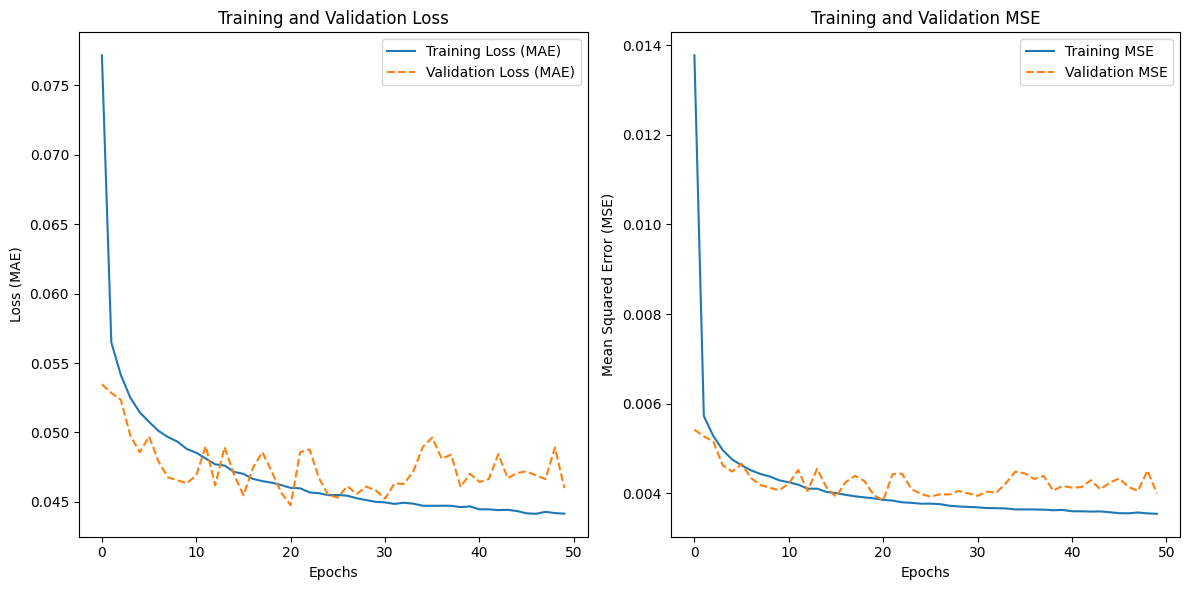

In [ ]:
plt.figure(figsize=(12, 6))

# Loss (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()

# Metrics (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# This model uses generic model structure, has both features and label scaled.
# Scaled using StandardScalar

model = Sequential()
_, input_shape  = x_train.shape
input_layer = keras.layers.InputLayer(input_shape=(input_shape,), name='input')
model.add(input_layer)
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
model.add(hidden_layer_1)
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
model.add(hidden_layer_2)
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
model.add(hidden_layer_3)
output_layer = keras.layers.Dense(units=1, activation='linear', name='output')
model.add(output_layer)

model.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])
history = model.fit(x_train_stand, y_train_stand, validation_data=(x_val_stand, y_val_stand), epochs=50, batch_size=32)


y_pred_stand = model.predict(x_test_stand)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_stand)
mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE on Original Scale: {mae_original}")
print(f"MSE on Original Scale: {mse_original}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 64s 2ms/step - loss: 0.0851 - mae: 0.0851 - mse: 0.0255 - val_loss: 0.0508 - val_mae: 0.0508 - val_mse: 0.0050
Epoch 2/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0453 - mae: 0.0453 - mse: 0.0040 - val_loss: 0.0495 - val_mae: 0.0495 - val_mse: 0.0047
Epoch 3/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0425 - mae: 0.0425 - mse: 0.0035 - val_loss: 0.0514 - val_mae: 0.0514 - val_mse: 0.0050
Epoch 4/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0408 - mae: 0.0408 - mse: 0.0033 - val_loss: 0.0480 - val_mae: 0.0480 - val_mse: 0.0045
Epoch 5/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.0395 - mae: 0.0395 - mse: 0.0031 - val_loss: 0.0494 - val_mae: 0.0494 - val_mse: 0.0048
Epoch 6/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0387 - mae: 0.0387 - mse: 0.0030 - val_loss: 0.0546 - val_mae: 0.0546 - val_mse: 0.0055
Epoch 7/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0377 - mae: 0.037

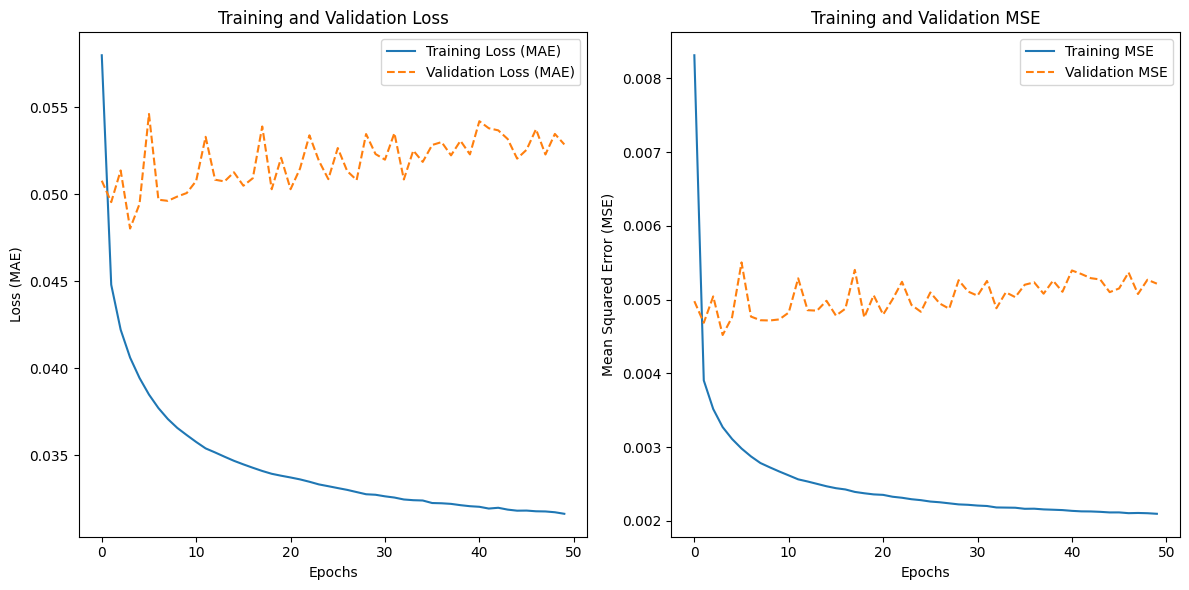

In [ ]:
plt.figure(figsize=(12, 6))

# Loss (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()

# Metrics (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# this model uses batch normalization and has both features and labels scaled
# they are scaled using Standard Scalar
model = Sequential()

# Input Layer
_, input_shape = x_train.shape
model.add(InputLayer(input_shape=(input_shape,), name='input'))

# Hidden Layer 1 with Batch Normalization
model.add(Dense(units=64, name='hl_1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 2 with Batch Normalization
model.add(Dense(units=32, name='hl_2'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Hidden Layer 3 with Batch Normalization
model.add(Dense(units=16, name='hl_3'))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Output Layer
model.add(Dense(units=1, activation='linear', name='output'))

# Compile the Model
model.compile(optimizer='adam', loss='mae', metrics=['mse', 'mae'])

# Fit the Model
history = model.fit(
    x_train_stand, y_train_stand,
    validation_data=(x_val_stand, y_val_stand),
    epochs=50, batch_size=32
)

# Predict and Evaluate
y_pred_stand = model.predict(x_test_stand)
y_pred_original_scale = y_scaler.inverse_transform(y_pred_stand)

mae_original = mean_absolute_error(y_test, y_pred_original_scale)
mse_original = mean_squared_error(y_test, y_pred_original_scale)
print(f"MAE on Original Scale: {mae_original}")
print(f"MSE on Original Scale: {mse_original}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.1595 - mae: 0.1595 - mse: 0.1084 - val_loss: 0.0550 - val_mae: 0.0550 - val_mse: 0.0057
Epoch 2/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0560 - mae: 0.0560 - mse: 0.0056 - val_loss: 0.0513 - val_mae: 0.0513 - val_mse: 0.0050
Epoch 3/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0533 - mae: 0.0533 - mse: 0.0051 - val_loss: 0.0516 - val_mae: 0.0516 - val_mse: 0.0050
Epoch 4/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - loss: 0.0519 - mae: 0.0519 - mse: 0.0048 - val_loss: 0.0506 - val_mae: 0.0506 - val_mse: 0.0048
Epoch 5/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 0.0511 - mae: 0.0511 - mse: 0.0047 - val_loss: 0.0501 - val_mae: 0.0501 - val_mse: 0.0047
Epoch 6/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - loss: 0.0501 - mae: 0.0501 - mse: 0.0045 - val_loss: 0.0491 - val_mae: 0.0491 - val_mse: 0.0045
Epoch 7/50
7168/7168 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 0.0497 - mae: 0.049

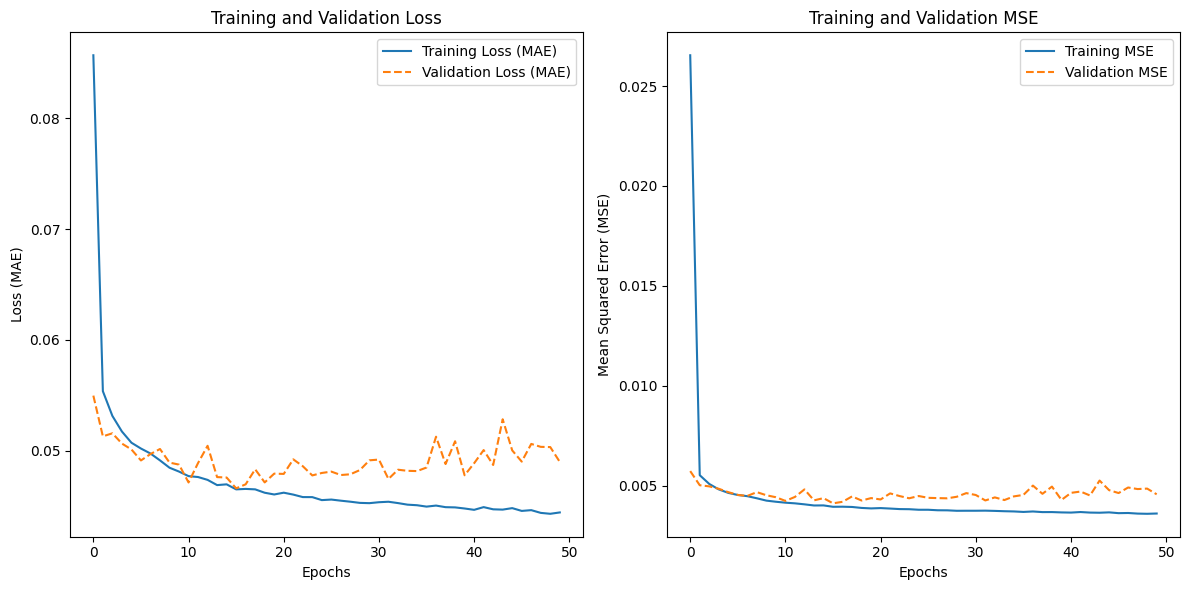

In [ ]:
plt.figure(figsize=(12, 6))

# Loss (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss (MAE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MAE)', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss')
plt.legend()

# Metrics (MSE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE', linestyle='--')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation MSE')
plt.legend()

plt.tight_layout()
plt.show()

399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


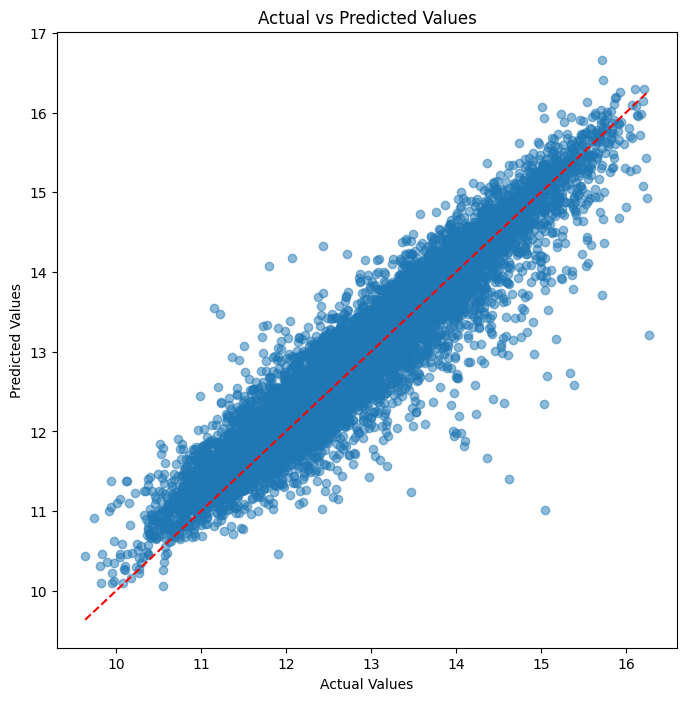

In [ ]:
y_pred_scaled = model.predict(x_test_stand)
y_pred_original = y_scaler.inverse_transform(y_pred_scaled)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_original, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.show()